In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/data'

Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/data"

original  resized_224  resized_299


In [0]:
import cv2
import tensorflow
from keras import layers
from keras import models
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator 
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt





Using TensorFlow backend.


In [0]:
#directory of the dataset
base_dir = '/content/gdrive/My Drive/data/resized_224'

train_dir = '/content/gdrive/My Drive/data/resized_224/train'
validation_dir = '/content/gdrive/My Drive/data/resized_224/validation'
test_dir = '/content/gdrive/My Drive/data/resized_224/test'



In [0]:
#Setting up a DATA AUGMENTATION configuration via ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


#defining a VGG like CNN model which includes DROPOUT
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

#Configuring model for training
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#Training our CNN using data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


#Note that the validation and test data should not be augmentated
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


#generators
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')
    #since we use binary_crossentropy loss, we need binary labels
    
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=50)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
___________________________

In [0]:
#Evaluating the model- test on finalised model
#Returns the loss value and metrics values for the model in test mode.

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

#finally evaluate this model on the test data
results = model.evaluate_generator(
    test_generator,
    steps=200)

print('Final test accuracy:', (results[1]*100.0))
 

Found 200 images belonging to 2 classes.
Final test accuracy: 65.03142458100558


In [0]:
#Saving the model
model.save('cardiomegaly_1_a.h5')

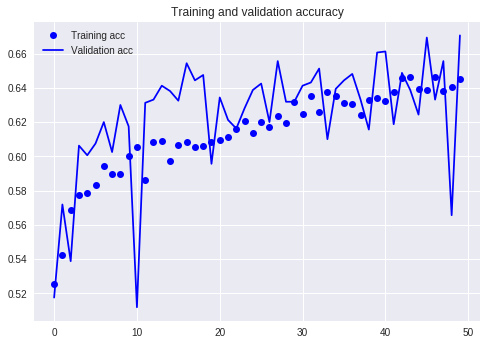

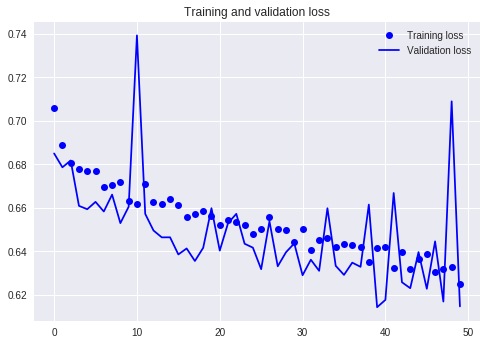

In [0]:
#finally plot the loss and accuracy of the model over the training and validation data during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

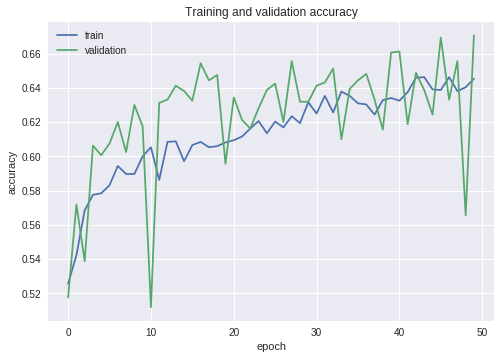

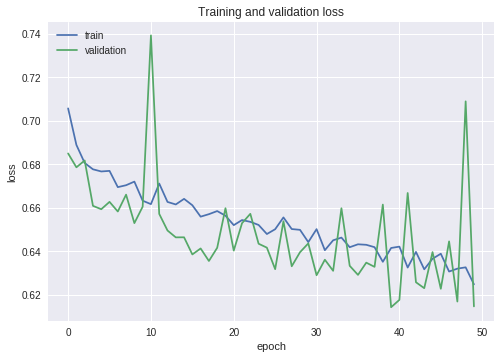

In [0]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('loss', dpi=250)
plt.show()

In [0]:
import keras
from keras.utils import plot_model
keras.utils.plot_model(model, to_file='./graph_1_a.png')